# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key from a file that is ignored by Git (.gitignore file) so the key isn't exposed to the public
from config import wkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [5]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations and zip into a list of tuples
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination using the Citypy package to return a unique city and country code
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Combine the two lists into a list using the zip function
city_country = zip(cities,countries)

# Print the city count to confirm sufficient count ( Greater than 500 )
print(len(cities))

663


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# set up lists to hold reponse info
city_id = []
city_name = []
country = []
latitude = []
longitude = []
weather_date = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Open file to write results of API calls - success or not into a txt file and into a csv
myprintlog = open('weatherAPI_printlog.txt', 'w')
myAPIdata = open('weatherAPI_data.csv', 'w')

# Write header line for csv file
myAPIdata.write("city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed\n")

# Loop through the list of cities, country codes and perform a request
for city,country_code in city_country:
    query_url = f"{url}appid={wkey}&q={city},{country_code}&units={units}"
    response = requests.get(query_url).json()

    # Getting the temp, humidity, cloudiness and wind speed in the Weather API;
    # if the city is not found on the WeatherAPI site then the "except" will catch that and the loop will
    # continue to the rest of the city, country_codes in the city_country list.
    try:
        # Create variables for each response item and format to desired datatype
        cityID = int(response['id'])
        cityName = response['name']
        countryCode = response['sys']['country']
        lat_val = response['coord']['lat']
        lon_val = response['coord']['lon']
        weatherDate = (datetime.fromtimestamp(response['dt'])).strftime('%m/%d/%y')
        temperature = response['main']['temp']
        humidity_val = response['main']['humidity']
        cloudiness_val = response['clouds']['all']
        windSpeed = response['wind']['speed']
        
        # Append retreived values to lists above using the variables created
        city_id.append(cityID)
        city_name.append(cityName)
        country.append(countryCode)
        latitude.append(lat_val)
        longitude.append(lon_val)
        weather_date.append(weatherDate)
        temp.append(temperature)
        humidity.append(humidity_val)
        cloudiness.append(cloudiness_val)
        wind_speed.append(windSpeed)
        
        # Output line to terminal to mark progress and store it to a print log text file
        print(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        myprintlog.write(f"{cityName} with city ID:{cityID} was found in the Weathermap API\n")
        
        # Output all retreived values to a csv file
        myAPIdata.write(f"{cityID},{cityName},{countryCode},{lat_val},{lon_val},{weatherDate},\
            {temperature},{humidity_val},{cloudiness_val},{windSpeed}\n")
        
    # Handle exceptions for a city that is not available in the Weather API
    except:
        
        print(f"{city},{country_code} was not found in the Weathermap API\n")
        myprintlog.write(f"{city},{country_code} was not found in the Weathermap API\n")
        
        # Append null values so lists have the same length
        city_id.append(None)
        city_name.append(None)
        country.append(None)
        latitude.append(None)
        longitude.append(None)
        weather_date.append(None)
        temp.append(None)
        humidity.append(None)
        cloudiness.append(None)
        wind_speed.append(None)
        pass
    
# Close the file handle after completion of the loop
myprintlog.close()
myAPIdata.close()


Ushuaia with city ID:3833367 was found in the Weathermap API

Mayo with city ID:6068416 was found in the Weathermap API

Kholodnyy with city ID:2124611 was found in the Weathermap API

Coquimbo with city ID:3893629 was found in the Weathermap API

Rikitea with city ID:4030556 was found in the Weathermap API

Port Elizabeth with city ID:964420 was found in the Weathermap API

Lorengau with city ID:2092164 was found in the Weathermap API

Karratha with city ID:6620339 was found in the Weathermap API

Mar del Plata with city ID:3430863 was found in the Weathermap API

Nome with city ID:5870133 was found in the Weathermap API

illoqqortoormiut,gl was not found in the Weathermap API

Hilo with city ID:5855927 was found in the Weathermap API

Pevek with city ID:2122090 was found in the Weathermap API

Czarnków with city ID:3101145 was found in the Weathermap API

Qaanaaq with city ID:3831208 was found in the Weathermap API

Mount Gambier with city ID:2156643 was found in the Weathermap API



Koumac with city ID:2140558 was found in the Weathermap API

Carnarvon with city ID:2074865 was found in the Weathermap API

Marshfield with city ID:5261969 was found in the Weathermap API

Coahuayana Viejo with city ID:4013679 was found in the Weathermap API

Champagnole with city ID:3027235 was found in the Weathermap API

Zyryanka with city ID:2119283 was found in the Weathermap API

Khasan with city ID:2039557 was found in the Weathermap API

Tigil' with city ID:2120612 was found in the Weathermap API

Kumul with city ID:1529484 was found in the Weathermap API

Hasaki with city ID:2112802 was found in the Weathermap API

Badou with city ID:2367660 was found in the Weathermap API

Saldanha with city ID:3361934 was found in the Weathermap API

Tasiilaq with city ID:3424607 was found in the Weathermap API

New Norfolk with city ID:2155415 was found in the Weathermap API

Port-Gentil with city ID:2396518 was found in the Weathermap API

Manado with city ID:1636544 was found in the Weat

Tselinnoye with city ID:1489138 was found in the Weathermap API

Oytal with city ID:1520281 was found in the Weathermap API

Salalah with city ID:286621 was found in the Weathermap API

Wenling with city ID:1791464 was found in the Weathermap API

Porto Velho with city ID:3662762 was found in the Weathermap API

saleaula,ws was not found in the Weathermap API

Lethem with city ID:3379316 was found in the Weathermap API

Cedar City with city ID:5536630 was found in the Weathermap API

Mubi with city ID:2329821 was found in the Weathermap API

Hamilton with city ID:3573197 was found in the Weathermap API

eldikan,ru was not found in the Weathermap API

Wasserburg with city ID:2813758 was found in the Weathermap API

Bowen with city ID:2174444 was found in the Weathermap API

Dikson with city ID:1507390 was found in the Weathermap API

Kawalu with city ID:1640902 was found in the Weathermap API

Koygorodok with city ID:543396 was found in the Weathermap API

Guerrero Negro with city ID:40

Kyzyl-Mazhalyk with city ID:1500957 was found in the Weathermap API

Ende with city ID:1644932 was found in the Weathermap API

Ouadda with city ID:236901 was found in the Weathermap API

Port Hedland with city ID:2063042 was found in the Weathermap API

cockburn harbour,tc was not found in the Weathermap API

Letpadan with city ID:1292313 was found in the Weathermap API

Goundam with city ID:2456917 was found in the Weathermap API

Granada with city ID:2517115 was found in the Weathermap API

Honiara with city ID:2108502 was found in the Weathermap API

Ballina with city ID:2177069 was found in the Weathermap API

Ulaanbaatar with city ID:2028462 was found in the Weathermap API

Souillac with city ID:933995 was found in the Weathermap API

Acapulco de Juárez with city ID:3533462 was found in the Weathermap API

satitoa,ws was not found in the Weathermap API

Port Blair with city ID:1259385 was found in the Weathermap API

Gmina Końskie with city ID:768218 was found in the Weathermap A

Ponta do Sol with city ID:2264557 was found in the Weathermap API

Dumas with city ID:5520552 was found in the Weathermap API

Arawa with city ID:2100633 was found in the Weathermap API

Martapura with city ID:1636022 was found in the Weathermap API

Regeneração with city ID:3390700 was found in the Weathermap API

Longview with city ID:4707814 was found in the Weathermap API

marv dasht,ir was not found in the Weathermap API

Korla with city ID:1529376 was found in the Weathermap API

Mozarlândia with city ID:3456642 was found in the Weathermap API

maloshuyka,ru was not found in the Weathermap API

Taltal with city ID:3870243 was found in the Weathermap API

Taoudenni with city ID:2450173 was found in the Weathermap API

Hobyo with city ID:57000 was found in the Weathermap API

Dhidhdhoo with city ID:1337612 was found in the Weathermap API

Prince Albert with city ID:6113335 was found in the Weathermap API

Bilibino with city ID:2126682 was found in the Weathermap API

Sri Aman with 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# Creating dictionary from the list created above
weather_dict = {
    "city_id": city_id,
    "city_name": city_name,
    "country": country,
    "latitude": latitude,
    "longitude": longitude,
    "weather_date": weather_date,
    "temp": temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind_speed": wind_speed
}

# Dataframe named weather_data
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3833367.0,Ushuaia,AR,-54.80,-68.30,10/26/20,50.00,31.0,20.0,21.92
1,6068416.0,Mayo,CA,63.59,-135.90,10/26/20,28.40,92.0,90.0,5.82
2,2124611.0,Kholodnyy,RU,62.72,147.95,10/26/20,11.89,85.0,0.0,1.79
3,3893629.0,Coquimbo,CL,-29.95,-71.34,10/26/20,55.40,87.0,0.0,10.29
4,4030556.0,Rikitea,PF,-23.12,-134.97,10/26/20,74.57,86.0,100.0,13.11


In [8]:
# Dataframe with only non-null values
# Droping the NaN values
weather_data_values = weather_data.dropna()

# Reseting index
weather_data_values = weather_data_values.reset_index(drop=True)

# Change the datatype for the city_id field to an integer (it gets created as a float)
weather_data_values['city_id'] = weather_data_values['city_id'].astype(int)

weather_data_values.head()

,city_id,city_name,country,latitude,longitude,weather_date,temp,humidity,cloudiness,wind_speed
0,3833367,Ushuaia,AR,-54.80,-68.30,10/26/20,50.00,31.0,20.0,21.92
1,6068416,Mayo,CA,63.59,-135.90,10/26/20,28.40,92.0,90.0,5.82
2,2124611,Kholodnyy,RU,62.72,147.95,10/26/20,11.89,85.0,0.0,1.79
3,3893629,Coquimbo,CL,-29.95,-71.34,10/26/20,55.40,87.0,0.0,10.29
4,4030556,Rikitea,PF,-23.12,-134.97,10/26/20,74.57,86.0,100.0,13.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.



#### Latitude vs. Temperature Plot

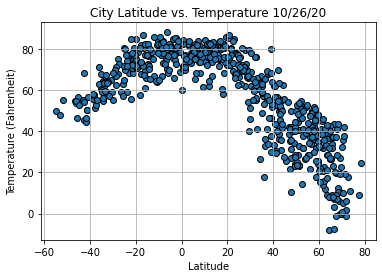

In [10]:
# Scatter plot for Latitude vs.Temperature in Fahrenheit
weatherDate = weather_data_values['weather_date'][0]
plt.scatter(weather_data_values["latitude"], weather_data_values["temp"], marker="o",edgecolors='black')

# Graph properties
plt.title(f"City Latitude vs. Temperature {weatherDate}")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsTemp.png")

# Show plot
plt.show()


In [ ]:
# As you move north of the equator from a latitude of 0 to a latitude of 80 we see a linear decrease in temperature from 70 degrees Fahrenheit to -40 degrees Fahrenheit.

# However, we do not see much of a drop moving south of the equator from 0 degrees latitude to around -55 degrees latitude. One reason for this is that there are so few cities in the southern hemisphere.

#### Latitude vs. Humidity Plot

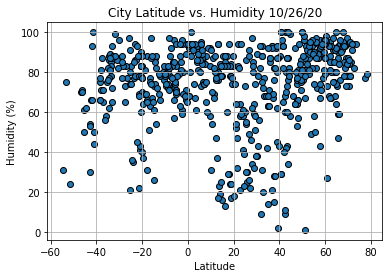

In [11]:
# Scatter plot for Latitude vs. Humidity
plt.scatter(weather_data_values["latitude"], weather_data_values["humidity"], marker="o",edgecolors='black')

# Graph properties
plt.title(f"City Latitude vs. Humidity {weatherDate}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsHum.png")

# Show plot
plt.show()


In [ ]:
# The Latitude vs. Humidity plot does not seem to have a strong correlation between the two variables.

#### Latitude vs. Cloudiness Plot

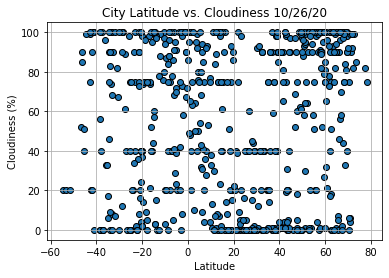

In [12]:
# Scatter plot for Latitude vs. Cloudiness
plt.scatter(weather_data_values["latitude"], weather_data_values["cloudiness"], marker="o",edgecolors='black')

# Graph properties
plt.title(f"City Latitude vs. Cloudiness {weatherDate}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsCloud.png")

# Show plot
plt.show()

In [ ]:
# In this graph, Cloudiness does not seem to have any correlation to latitude.

#### Latitude vs. Wind Speed Plot

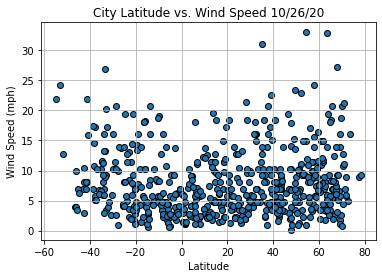

In [13]:
# Scatter plot for Latitude vs. Wind Speed
plt.scatter(weather_data_values["latitude"], weather_data_values["wind_speed"], marker="o",edgecolors='black')

# Graph properties
plt.title(f"City Latitude vs. Wind Speed {weatherDate}")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("LatVsWind.png")

# Show plot
plt.show()


In [ ]:
# This plot suggests that there is no strong correlation between Wind Speed and Latitude.

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

# Making a function that accepts a list of x values and y values, a description for the x and y axes,
# a string that describes which hemisphere is being analyzed and a filename to use while saving the figure

def make_lin_reg_plot(x_values,y_values,x_desc,y_desc,hemisphere,filename,x_ann,y_ann):
    # Print out the r-squared value along with the plot.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values,edgecolors='black')
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"{hemisphere}-\nCity {x_desc} vs. {y_desc} {weatherDate}")
    plt.annotate(line_eq,(x_ann,y_ann),fontsize=15,color="red")
    plt.xlabel(x_desc)
    plt.ylabel(y_desc)
    print(f"The r-squared is: {rvalue}")
    print(line_eq)
    plt.savefig(f'{filename}')
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames

# Store the boolean criteria in a variable to pass to the dataframe indexing function
crit_north = weather_data_values.latitude >= 0
crit_south = weather_data_values.latitude < 0

# Creating the north and south hemisphere dataframes
north_weather = weather_data_values[crit_north]
south_weather = weather_data_values[crit_south]

# Reseting with the drop=True argument
north_weather = north_weather.reset_index(drop=True)
south_weather = south_weather.reset_index(drop=True)
#north_weather.head()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8692720378009582
y = -0.95x + 88.44


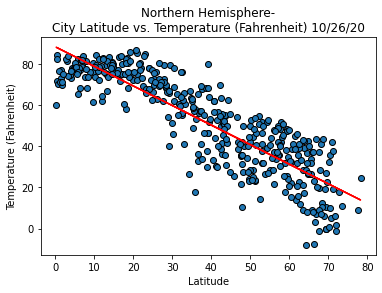

In [16]:
make_lin_reg_plot(north_weather["latitude"],north_weather["temp"],\
                  'Latitude','Temperature (Fahrenheit)','Northern Hemisphere',\
                 'NorthHemiLatVsTemp.png',6,-20)

In [ ]:
# This scatterplot has and r-squared value of -0.869, so there is a strong negative linear relationship between the latitude and the temperature in the Northern Hemisphere. This means that aprox. 87% of the variance is explained by this linear model.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8011579353004092
y = 0.63x + 83.54


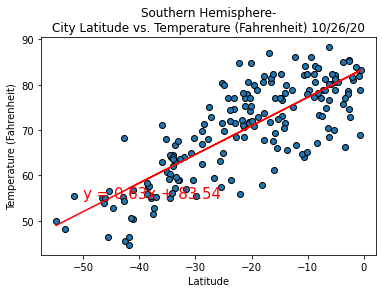

In [17]:
make_lin_reg_plot(south_weather["latitude"],south_weather["temp"],\
                  'Latitude',f'Temperature (Fahrenheit)','Southern Hemisphere',\
                 'SouthHemiLatVsTemp.png',-50,55)

In [ ]:
# This scatterplot has and r-squared value of 0.80, so there is a strong positive linear relationship between the latitude and the temperature in the Southern Hemisphere, as expected. This means that aprox. 80% of the variance is explained by this linear model.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.22175234604147182
y = 0.23x + 65.45


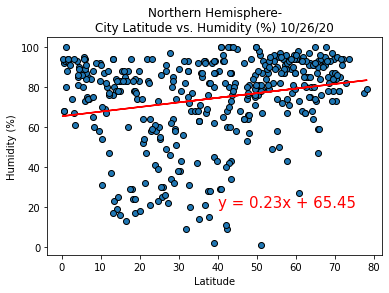

In [18]:
make_lin_reg_plot(north_weather["latitude"],north_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Northern Hemisphere',\
                 'NorthHemiLatVsHumidity.png',40,20)

In [ ]:
# This scatter plot shows a very weak relationship between latitude and humidity in the Northern Hemisphere with an r-squared value of 0.22. This means the linear fitted curve can only account for 22% of the variance seen in the data, leaving the vast majority of the variance unexplained by the equation.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19166967876316426
y = 0.23x + 78.9


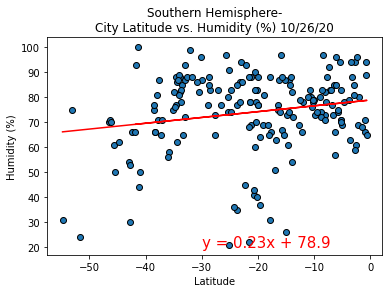

In [19]:
make_lin_reg_plot(south_weather["latitude"],south_weather["humidity"],\
                  'Latitude',f'Humidity (%)','Southern Hemisphere',\
                 'SouthHemiLatVsHumidity.png',-30,20)

In [ ]:
# In the Southern Hemisphere there is a weak correlation between latitude and humidity. The linear regression has an r-squared value of 0.19 - meaning 19% of the variance in the data is explained by the fitted curve.
# In this case, other factors play the majority of the role in the change in humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.23075505801605312
y = 0.43x + 35.25


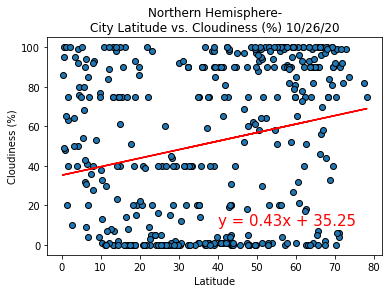

In [20]:
make_lin_reg_plot(north_weather["latitude"],north_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Northern Hemisphere',\
                 'NorthHemiLatVsCloudiness.png',40,10)


In [ ]:
# In the Northern Hemisphere there does not seem to be a significant correlation between latitude and cloudiness. The linear regression curve fit yields an equation of the line with an r-squared value of only 0.23 - meaning the linear equation of the line only explains 23% of the observed variance.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.11857393624111838
y = 0.33x + 63.54


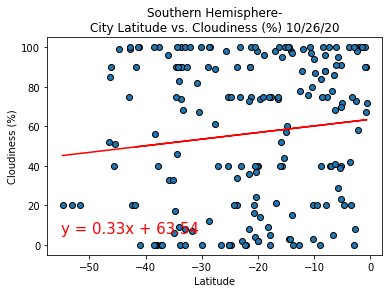

In [21]:
make_lin_reg_plot(south_weather["latitude"],south_weather["cloudiness"],\
                  'Latitude',f'Cloudiness (%)','Southern Hemisphere',\
                 'SouthHemiLatVsCloudiness.png',-55,6)

In [ ]:
# In the Southern Hemisphere, latitude has a very weak correlation with cloudiness with a linear regression yielding an r-squared value of 0.12 - or 12% of the variance of the observed data can be accounted for by the equation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19598346812201425
y = 0.05x + 5.83


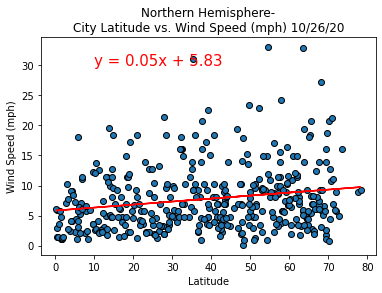

In [22]:
make_lin_reg_plot(north_weather["latitude"],north_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Northern Hemisphere',\
                 'NorthHemiLatVsWindSpeed.png',10,30)


In [ ]:
# As was the case before, there is a weak correlation between latitude and wind speed in the Northern Hemisphere. The linear regression gives us a low r-squared value of 0.196.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.3296100013557792
y = -0.14x + 5.04


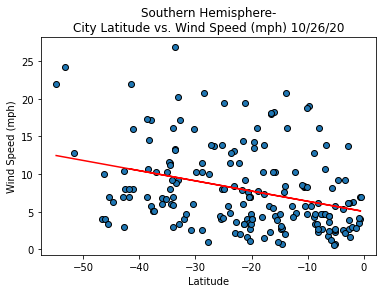

In [23]:
make_lin_reg_plot(south_weather["latitude"],south_weather["wind_speed"],\
                  'Latitude',f'Wind Speed (mph)','Southern Hemisphere',\
                 'SouthHemiLatVsWindSpeed.png',-30,30)

In [ ]:
# A weak negative correlation between this variables; the majority of the variance (nearly 70%) cannot be explained by the linear regression data.
# Again, it is important to mention that there are so few cities south of -50 degrees latitude, which also may be a function of sparse data.